## 911 Call Type Word Cloud (Mac OS) ##

A program for generating a word cloud of 911 call types and their frequency in 911 reports from Jan-Jun 2013. Need to re-access csv files to improve type frequency check.

The program may be ammended to create any number of word clouds given an input txt file. A csv file may be used as well, the relavent information from which is parsed and saved into a txt file for use by the word cloud function.

In [12]:
# Author: Elizabeth Brooks
# Date Modified: 06/25/2015
# Edited: Hayden Fuss

# PreProcessor Directives
%matplotlib inline
import matplotlib
import csv
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from scipy.misc import imread
import re
import os

# Function for generating a word cloud
## Mac OS specific font path in arguments
def typeWordCloud(file_path, mask_path=None, bg_color='white', num_words=150,
                   fontpath='/Library/Fonts/Microsoft Sans Serif.ttf', out_path='911typesCloud.png'):
    # Read in the txt file set by the main method
    text = open(file_path, 'r').read()
    # Generate the word cloud based on the input arguments
    wc = None
    if mask_path:
        # Use module to read the image file
        mass_mask = imread(mask_path)
        wc = WordCloud(mask=mass_mask, background_color=bg_color, max_words=num_words, 
                       font_path=fontpath).generate(text)
    else:
        wc = WordCloud(font_path=fontpath, max_words=num_words,
                       background_color=bg_color).generate(text)
    # Open a plot of the generated word cloud
    wc.to_file(out_path)
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
# End tweetWordCloud
## We can eventually move this to its own module


The above function generates a word cloud based on words in the txt file created in the main method.
For more info see: https://github.com/amueller/word_cloud

Enter csv filename:911_unsorted_2012_2013
Enter fontpath...
Mac -- /Library/Fonts/Microsoft Sans Serif.ttf
Windows -- sans_serif.ttf
/Library/Fonts/Microsoft Sans Serif.ttf


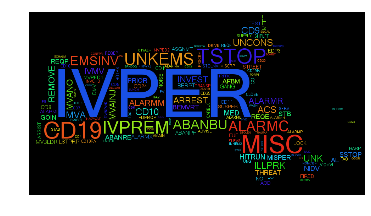

In [13]:
# The main method
def main():
    # Set the output image file path
    current_dir = os.getcwd()
    filepath = current_dir + '/OutputTypes.txt'
    # Create object for writting to a text file
    typeFile = open(filepath, "w")
    types = {}
    # Iterate through the 911 csv by type
    
    inputFile = raw_input("Enter csv filename:")
    fontPath = raw_input("Enter fontpath...\nMac -- /Library/Fonts/Microsoft Sans Serif.ttf\nWindows -- sans_serif.ttf\n")
    
    with open(current_dir + '/../' + inputFile + '.csv') as csvfile:  
        typeIt = csv.DictReader(csvfile)
        # Retrieve the strings of types
        for typeData in typeIt:
            typeFile.write(typeData['TYPE'] + '\n')
    # Close the file obj
    typeFile.close() 
    # Use the defined function to create the type word cloud
    typeWordCloud(filepath, current_dir + '/mass_map.png', 'black', fontpath=fontPath)
# End main

# Run the script via the main method
if __name__ == "__main__":
    main()
    
# End script

The method main() begins the script by writting to a master text file all of the types (and their frequencies) found with in the 911 reports csv file for the year 2013.